過去1ヶ月日本の地震のデータ

In [1]:
import pandas as pd
%pip install requests
import requests
# USGSから過去1か月の地震データを取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
response = requests.get(url)

# データをファイルに保存
with open('earthquakes.csv', 'wb') as file:
    file.write(response.content)

# データをDataFrameに読み込む
data = pd.read_csv('earthquakes.csv')

# データの最初の5行を表示
data.head()


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-11-12T06:24:47.471Z,31.598000,-104.195000,4.3074,2.30,ml,45.0,68.0,0.10000,0.30,...,2025-11-12T06:28:38.634Z,"49 km NW of Toyah, Texas",earthquake,0.00,0.859901,0.200,33.0,automatic,tx,tx
1,2025-11-12T06:21:50.090Z,38.826332,-122.797836,2.5800,1.09,md,21.0,56.0,0.01340,0.03,...,2025-11-12T06:47:18.954Z,"6 km W of Cobb, CA",earthquake,0.25,0.460000,0.070,21.0,automatic,nc,nc
2,2025-11-12T06:19:45.350Z,35.681000,-117.498167,4.4900,0.84,ml,24.0,71.0,0.06266,0.13,...,2025-11-12T06:23:13.683Z,"13 km SW of Searles Valley, CA",earthquake,0.21,0.570000,0.175,10.0,automatic,ci,ci
3,2025-11-12T06:16:23.460Z,33.518000,-116.741333,4.4400,0.55,ml,33.0,42.0,0.04740,0.17,...,2025-11-12T06:19:49.891Z,"8 km WSW of Anza, CA",earthquake,0.16,0.350000,0.240,15.0,automatic,ci,ci
4,2025-11-12T06:11:57.780Z,34.063500,-117.255000,13.9800,1.06,ml,63.0,33.0,0.04776,0.17,...,2025-11-12T06:15:28.628Z,"2 km NNE of Loma Linda, CA",earthquake,0.14,0.360000,0.214,30.0,automatic,ci,ci


In [2]:
%pip install requests pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install pandas matplotlib

データを読み込んでいます...
整理済みデータを保存しました: past_1_month_earthquakes.csv
可視化を作成しています...
ダッシュボード画像を保存しました: earthquake_impact_dashboard.png


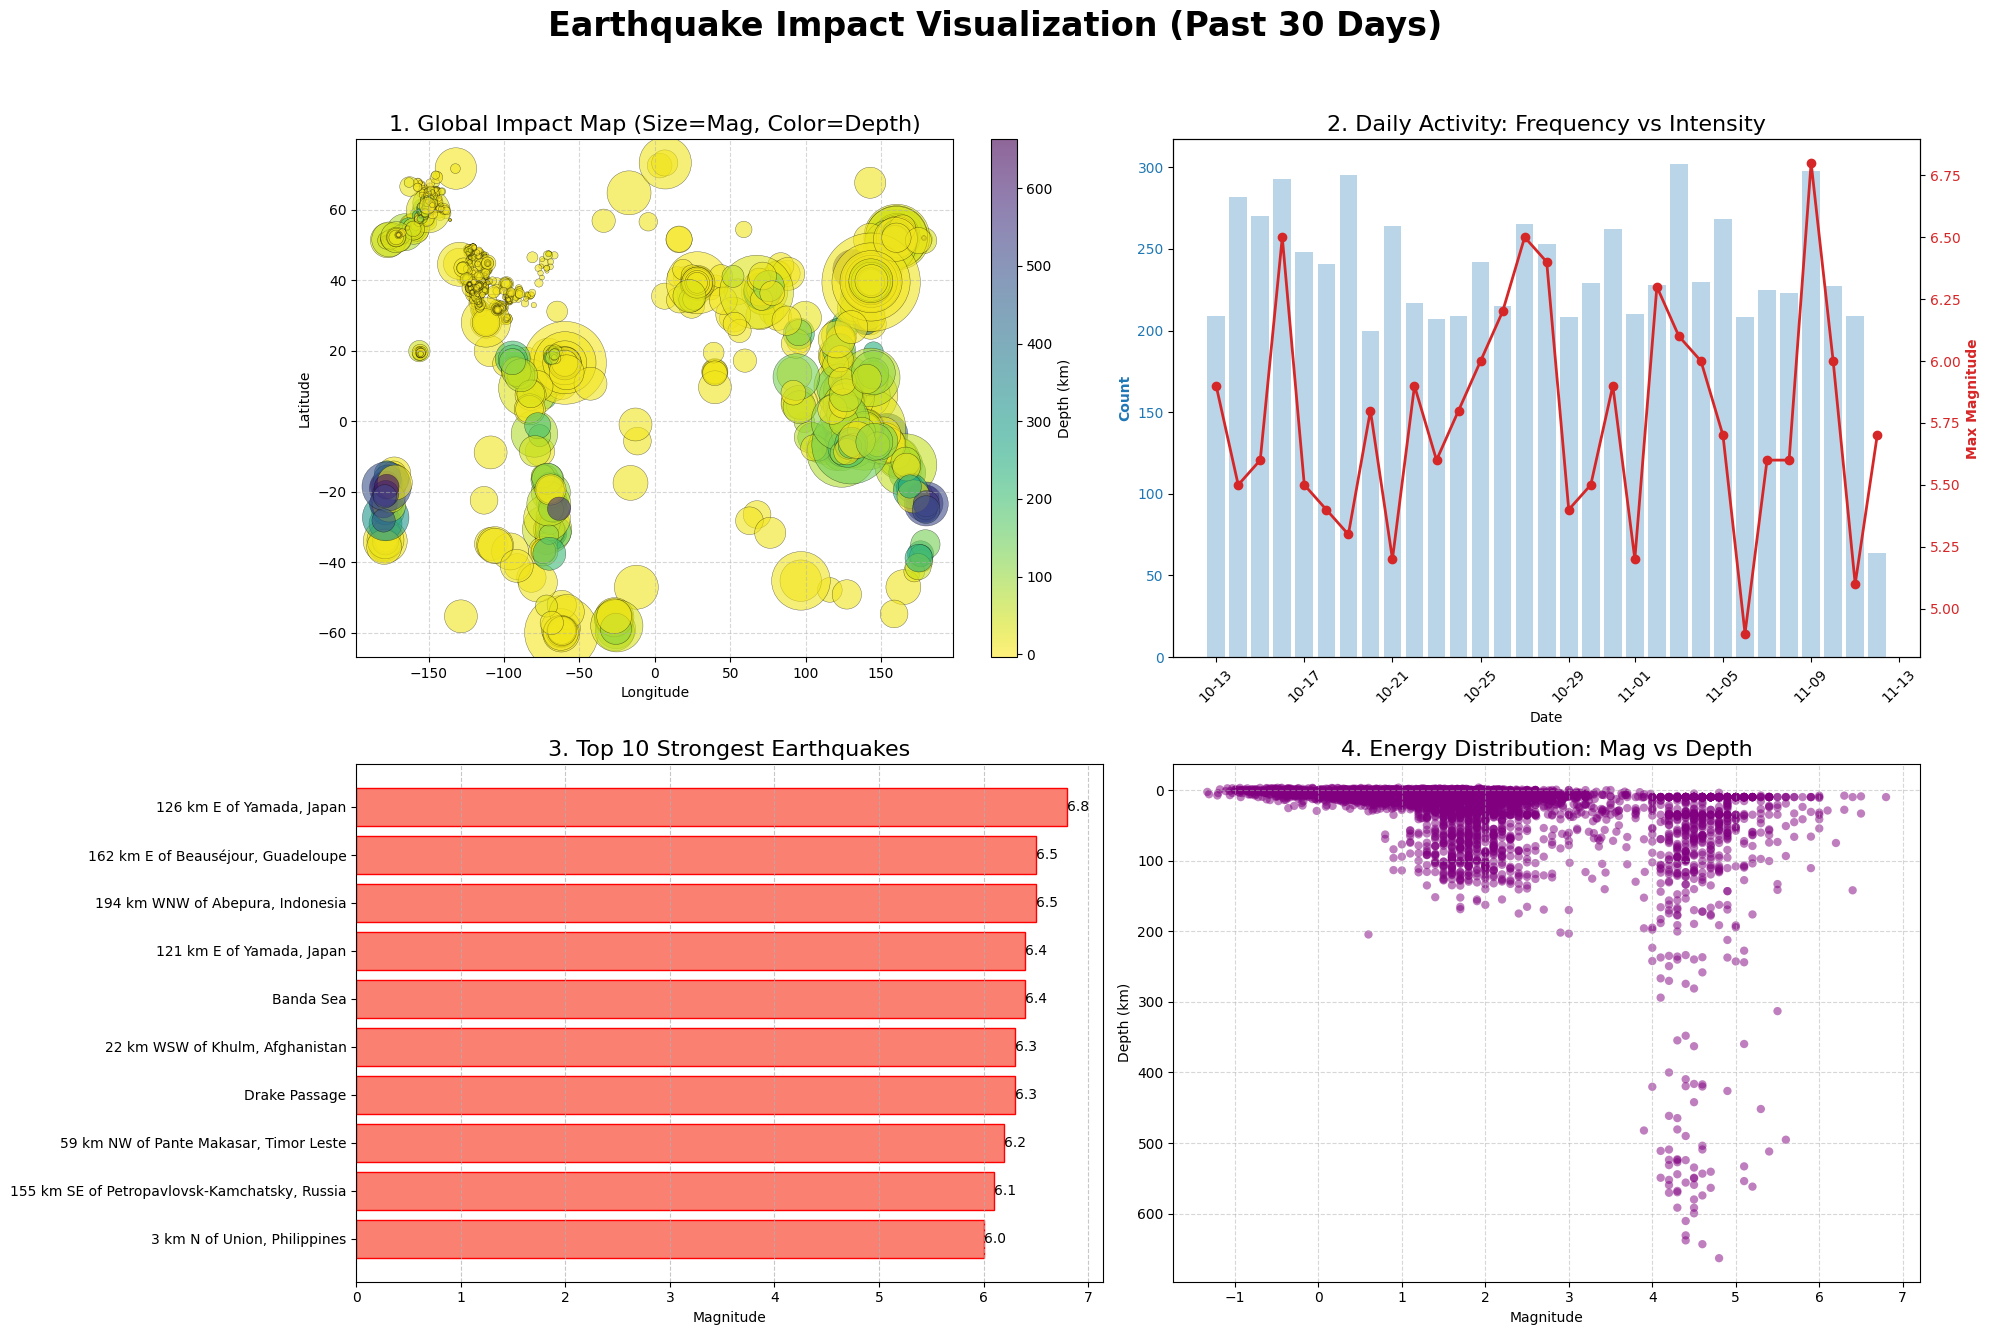

完了しました。


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def analyze_earthquake_data(file_path):
    # 1. データの読み込み
    print("データを読み込んでいます...")
    df = pd.read_csv(file_path)

    # 2. 時間データの変換
    df['time'] = pd.to_datetime(df['time'])

    # 3. 日付順にソート（過去1ヶ月の推移を見るため）
    df = df.sort_values('time')
    
    # 4. 分析用に日付カラムを追加
    df['date'] = df['time'].dt.date

    # 5. 整理したデータをCSVとして保存
    output_csv = 'past_1_month_earthquakes.csv'
    df.to_csv(output_csv, index=False)
    print(f"整理済みデータを保存しました: {output_csv}")

    return df

def create_impact_dashboard(df):
    print("可視化を作成しています...")
    # --- 修正箇所: pd.plotting... を plt... に変更しました ---
    fig, axes = plt.subplots(2, 2, figsize=(20, 14))
    fig.suptitle('Earthquake Impact Visualization (Past 30 Days)', fontsize=24, fontweight='bold')
    
    # --- Chart 1: Impact Map (左上) ---
    ax1 = axes[0, 0]
    sizes = 10 ** (df['mag'] / 2) * 2
    sc = ax1.scatter(df['longitude'], df['latitude'], 
                     s=sizes, c=df['depth'], cmap='viridis_r', 
                     alpha=0.6, edgecolors='k', linewidth=0.3)
    fig.colorbar(sc, ax=ax1, label='Depth (km)')
    ax1.set_title('1. Global Impact Map (Size=Mag, Color=Depth)', fontsize=16)
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')
    ax1.grid(True, linestyle='--', alpha=0.5)

    # --- Chart 2: Daily Activity (右上) ---
    ax2 = axes[0, 1]
    daily_counts = df.groupby('date').size()
    daily_max = df.groupby('date')['mag'].max()
    
    color = 'tab:blue'
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Count', color=color, fontweight='bold')
    ax2.bar(daily_counts.index, daily_counts.values, color=color, alpha=0.3, label='Count')
    ax2.tick_params(axis='y', labelcolor=color)
    
    ax2_twin = ax2.twinx()
    color = 'tab:red'
    ax2_twin.set_ylabel('Max Magnitude', color=color, fontweight='bold')
    ax2_twin.plot(daily_max.index, daily_max.values, color=color, marker='o', linewidth=2, label='Max Mag')
    ax2_twin.tick_params(axis='y', labelcolor=color)
    
    ax2.set_title('2. Daily Activity: Frequency vs Intensity', fontsize=16)
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax2.tick_params(axis='x', rotation=45)

    # --- Chart 3: Top 10 Strongest Earthquakes (左下) ---
    ax3 = axes[1, 0]
    top_10 = df.nlargest(10, 'mag').sort_values('mag', ascending=True)
    bars = ax3.barh(top_10['place'], top_10['mag'], color='salmon', edgecolor='red')
    ax3.set_xlabel('Magnitude')
    ax3.set_title('3. Top 10 Strongest Earthquakes', fontsize=16)
    ax3.grid(axis='x', linestyle='--', alpha=0.7)
    for bar in bars:
        width = bar.get_width()
        ax3.text(width, bar.get_y() + bar.get_height()/2, f'{width}', 
                 ha='left', va='center', fontsize=10)

    # --- Chart 4: Magnitude vs Depth (右下) ---
    ax4 = axes[1, 1]
    ax4.scatter(df['mag'], df['depth'], alpha=0.5, c='purple', edgecolors='none')
    ax4.set_xlabel('Magnitude')
    ax4.set_ylabel('Depth (km)')
    ax4.set_title('4. Energy Distribution: Mag vs Depth', fontsize=16)
    ax4.invert_yaxis()
    ax4.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    output_img = 'earthquake_impact_dashboard.png'
    plt.savefig(output_img)
    print(f"ダッシュボード画像を保存しました: {output_img}")
    plt.show()

if __name__ == "__main__":
    file_name = 'earthquakes.csv'
    
    try:
        df = analyze_earthquake_data(file_name)
        create_impact_dashboard(df)
        print("完了しました。")
    except FileNotFoundError:
        print(f"エラー: '{file_name}' が見つかりません。")

### 🌍 地震データ分析サマリー

**やったこと**
USGSの過去1ヶ月分（2025年10月-11月）の地震データをPythonで処理し、震源分布図、日別推移、規模ランキング、深度相関の4つの切り口で「Impact」を可視化・分析しました。

**わかったこと**
わずか30日間で7,301回もの地震が発生しており、期間中の最大規模であるM6.8は日本近海で観測されました。巨大地震は環太平洋火山帯に集中しており、M6クラスが発生すると活動のエネルギー量が突出して高まる傾向がデータからはっきりと読み取れました。

**感じたこと**
地図を埋め尽くす無数のプロットは、地球が常に「生きている」ことの証左であり、そのエネルギーの絶大さに圧倒されました。単なる数値の羅列を可視化することで、物理的な脅威としてのリアリティや、災害に対する備えの重要性をより直感的に感じることができました。